In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 가상 데이터로 실습하기

## 1.1 가상데이터 생성 및 확인

In [ ]:
# 가상의 분류용 데이터를 만들기 때문에 x와 y값으로 리턴한다. 
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50, centers = 3, cluster_std = 2, random_state=30)

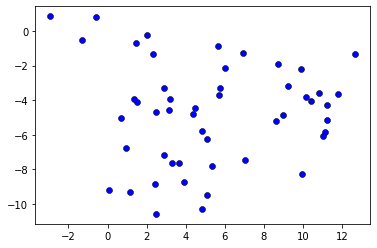

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', lw=0.5)
plt.show()

## 1.2 모델링

**Hierarchical Clustering(계층적 군집화)**

- Hierarchical clustering은 트리기반의 모델로 개체들을 가까운 집단부터 순차적이고 계층적으로 차근차근 군집화한다.  
- 이러한 방식으로 군집이 형성되므로 dendogram을 통해서 시각화가 가능하고, 계층적 구조로 인해 사전에 군집의 개수를 정하지 않아도 수행이 가능하다.
- 가장 처음에는 모든 군집이 하나의 데이터만을 가진다. 따라서 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 된다.  

hierarchical clustering의 군집방식은 다음과 같다.
1. 모든 개체들 사이의 거리 계산
2. 거리가 인접한 관측치끼리 cluster 형성
3. cluster 생성 후 새로운 거리 계산

군집 방식을 간단한 예로 설명해보자.  
진돗개, 셰퍼드, 요크셔테리어, 푸들, 물소, 젖소 를 계층적 군집 분석을 하게되면

![hc1](http://drive.google.com/uc?export=view&id=1jg3SKgIwMTvkSCHkxyJ7ks5_WerGfsOs)
1. 각각의 데이터가 하나의 군집을 형성한다.
  
![hc2](http://drive.google.com/uc?export=view&id=19jKMKfblZf4t10_Gz5v0nEXn01Cr7cUN)
2. 중형견, 소형견, 소와 같이 3개의 군집으로 묶일 수 있다.
  
![hc3](http://drive.google.com/uc?export=view&id=1sQu68pJw2WvpaM_3EN4bGrYLNMXlFrfe)
3. 한번 더 군집화하면 [진돗개,셰퍼드], [요크셔테리어,푸들] 군집은 하나의 군집(개)로 묶일 수 있다.
  
![hc4](http://drive.google.com/uc?export=view&id=1QlLHf6KmHVSzEZg6avVZTKg2bFAx3Mo1)
4. 마지막으로 전체가 하나의 군집(동물)로 묶이게 된다.

hierarchical clustering을 하기 위해서는 우선 모든 군집 간의 거리를 측정해야 한다.  
그렇다면 군집간의 거리는 어떻게 계산할까?  
이는 군집의 연결 방법에 따라 달라진다.  




![hc4](http://drive.google.com/uc?export=view&id=1L6ptqM-5_HgKvJWG2CrbHKTLVvUiP5_7)  


1. `단일(Single) 연결`:  
군집에 포함된 모든 데이터의 조합에 대해 데이터 사이의 거리가 가장 작은 값을 구한 뒤 이 값이 가장 작은 군집들을 연결한다. '최단연결법'이라고도 한다.
2. `완전(Complete) 연결`:  
군집에 포함된 모든 데이터의 조합에 대해 데이터 사이의 거리가 가장 큰 값을 구하여 이 값이 가장 작은 군집들을 연결한다. '최장연결법'이라고도 한다.
3. `평균(Average) 연결`:  
군집에 포함된 모든 데이터의 조합에 대해 데이터 사이의 거리를 측정하여 평균거리가 가까운 군집을 연결한다. '평균연결법'이라고도 한다.
4. `중심(Centroid) 연결`: 각 군집의 중심간의 거리를 측정하여 가까운 군집을 연결한다.  

.  

이 외에도 와드연결법, 가중거리 연결법 등 다양한 방법이 있으며 scipy 페이지에 보다 자세한 설명이 있으니 참고하자.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

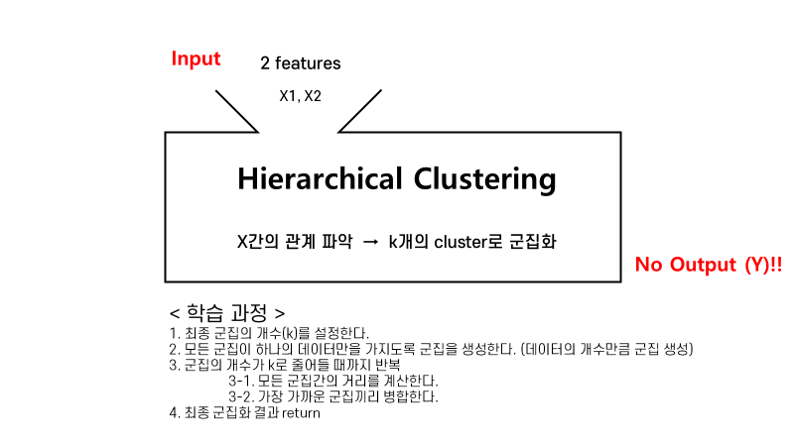

### 1.2.1 scipy 로 구현

Hierarchical Clustering은 scipy 패키지와 sklearn 패키지로 모두 구현할 수 있다.  
각각 장단점이 있는데 scipy 패키지는 군집화 결과를 트리 형태로 시각화해주는 dendrogram 명령도 지원한다.  
먼저 scipy로 구현해보자.

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# linkage 함수에 군집화 할 데이터 X를 학습데이터로 추가해 'complete' 방식으로 거리를 측정하는 군집화를 구현해보자
merge = linkage(X, method='complete')

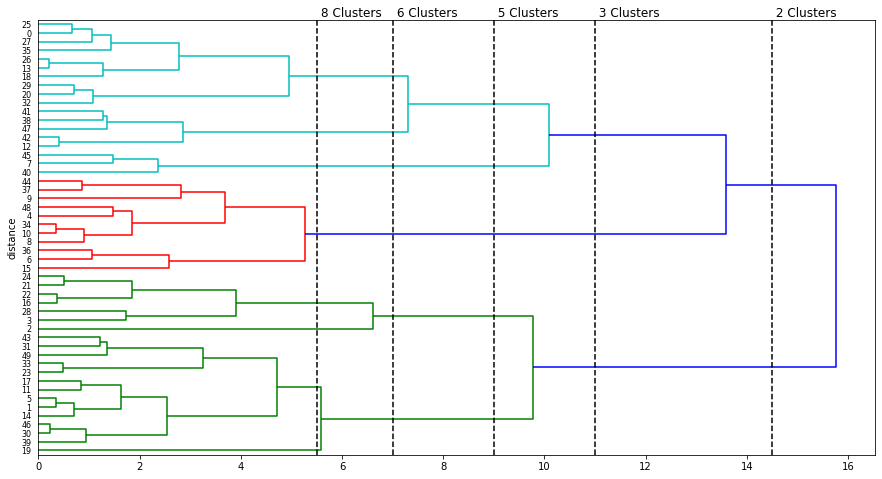

In [ ]:
# 군집화 결과를 dendogram을 통해 확인해보자
plt.figure(figsize = (15,8))
ax = plt.subplot(111)
dendrogram(merge, leaf_font_size=8, orientation='right')

bounds = ax.get_ybound() # y축 데이터(처음과 끝)
ax.plot([14.5, 14.5], bounds, linestyle='--', c='k') # 임의로 라인 생성
ax.plot([11, 11], bounds, linestyle='--', c='k')
ax.plot([9, 9], bounds, linestyle='--', c='k')
ax.plot([7, 7], bounds, linestyle='--', c='k')
ax.plot([5.5, 5.5], bounds, linestyle='--', c='k')
ax.text(14.5, bounds[1], ' 2 Clusters', va='bottom', fontdict={'size':12}) # bounds[1]: y축 끝
ax.text(11, bounds[1],' 3 Clusters', va='bottom', fontdict={'size':12})
ax.text(9, bounds[1],' 5 Clusters', va='bottom', fontdict={'size':12})
ax.text(7, bounds[1],' 6 Clusters', va='bottom', fontdict={'size':12})
ax.text(5.5, bounds[1],' 8 Clusters', va='bottom', fontdict={'size':12})

plt.ylabel('distance')
plt.show()

연결방법에 따라 군집화 결과에도 차이가 있을까?

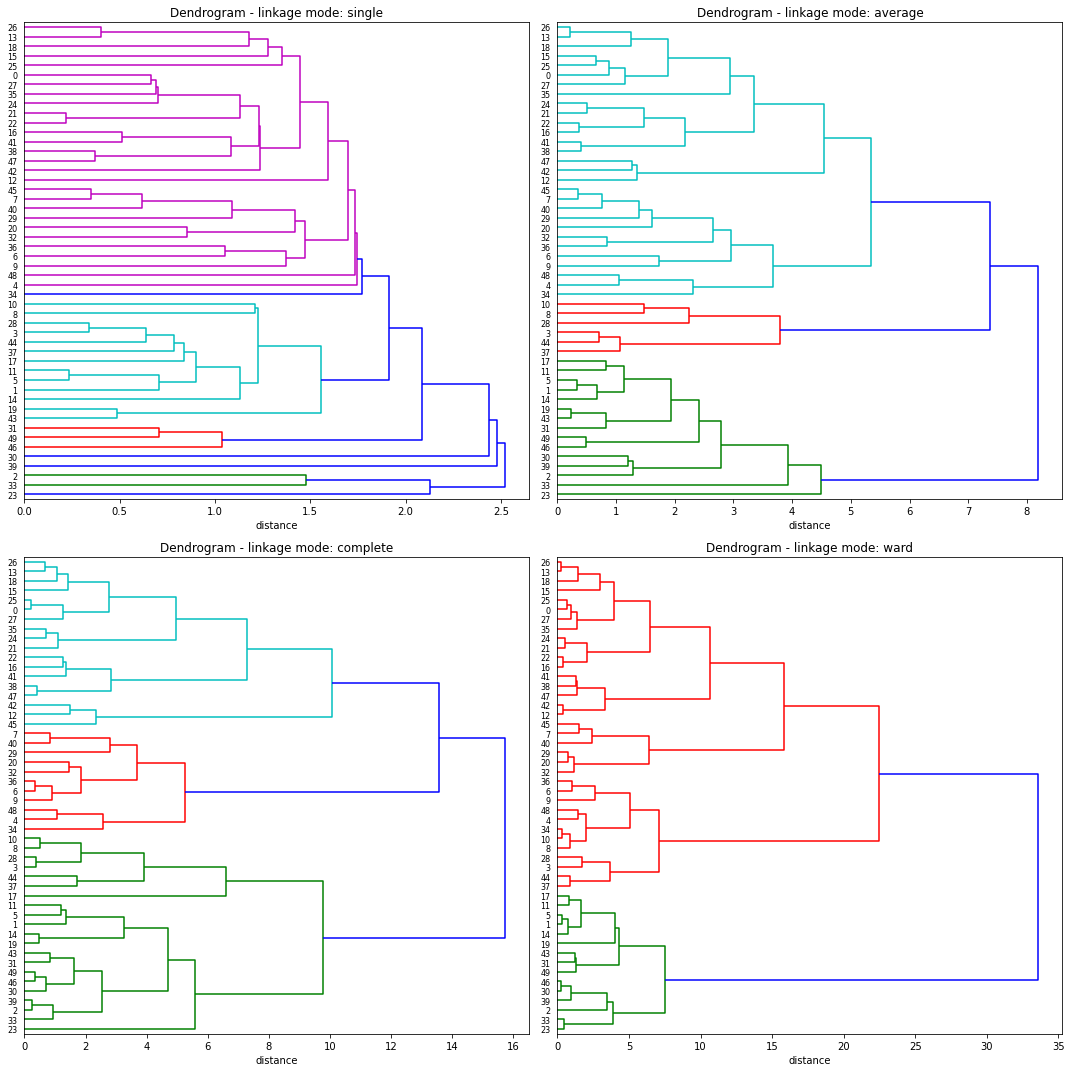

In [ ]:
# 최단연결법은 single, 평균연결법은 average, 최장연결법은 complete으로 표기한다.
modes = ['single', 'average', 'complete', 'ward']

plt.figure(figsize=(15,15))

# subplot() 함수를 사용하여 서브 플롯을 추가하고 반환 값을 y_axis라는 변수에 할당
# sharey 매개 변수를 사용하여 서브 플롯에 대한 모든 호출에 이 변수를 전달하여 모든 플롯이 동일한 y 축 사용
y_axis = None

# 모든 linkage mode 반복 생성
for i, mode in enumerate(modes):
    # 서브플롯 추가, y축은 공유
    y_axis = plt.subplot(2, 2, i + 1, sharey = y_axis)
    
    # 레이블링
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    
    # 클러스터링
    clustering = linkage(X, method = mode)
    
    # 덴드로그램
    dendrogram(clustering, orientation='right')
plt.tight_layout()
plt.show()

연결방법에 따라 군집간의 거리와 군집형성 결과가 다르게 나오는 것을 확인할 수 있다.

### 1.2.2 sklearn 으로 구현

이번에는 sklearn의 AgglomerativeClustering을 이용하여 hierarchical clustering을 구현해보자.  

Algglomerative Clustering 은 병합군집을 뜻한다(계층적 군집과 동일). 

mglearn 패키지에 병합군집의 알고리즘에 대한 설명을 시각화한 함수가 있으니 이를 참고해보자

In [ ]:
pip install mglearn

In [ ]:
import mglearn

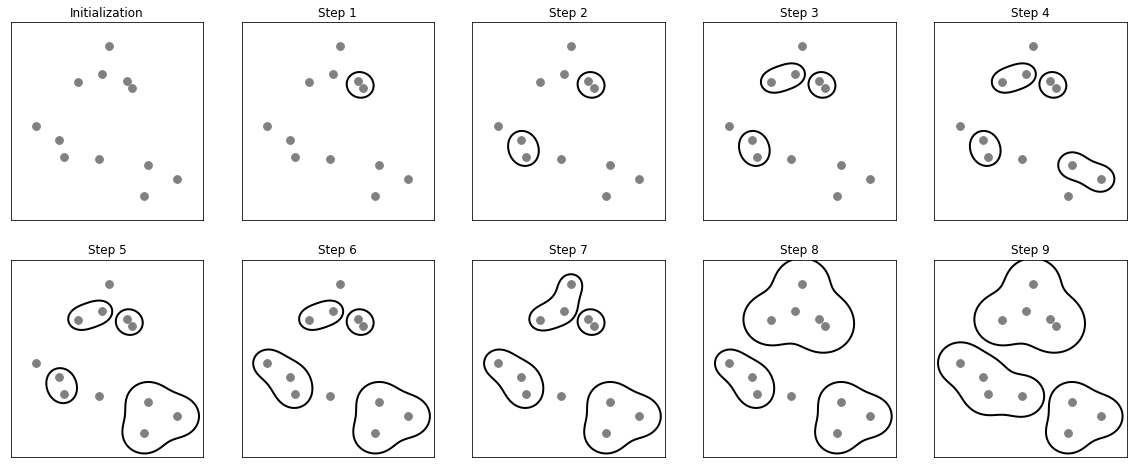

In [ ]:
# mglearn 패키지에 포함된 병합군집 알고리즘 시각화 설명
mglearn.plots.plot_agglomerative_algorithm()

AgglomerativeClustering
* 주요 parameter:
 - `n_clusters` : 군집화할 개수, 즉 군집 중심점의 개수, 기본값은 2
 - `affinity` : 군집간의 거리계산 지표, 기본값은 'euclidean'
        군집간의 거리를 계산하기 위해 사용되는 지표로 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed' 가 있다.
 - `linkage` : 군집 연결 방법, 기본값은 'ward'
        군집을 연결하는 방법으로 이에 따라 거리 측정방법이 달라진다.
        'ward', 'average', 'complete', 'single' 이 있다.


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# 먼저 평균연결법으로 euclidean 거리를 기반으로 하는 군집모델을 생성 후 학습시켜보자.
agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

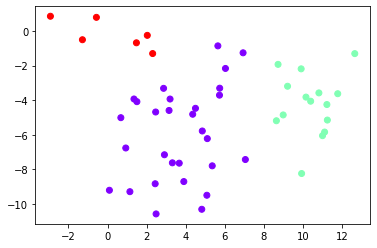

In [ ]:
# 군집결과를 시각화로 확인해보자
plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap='rainbow')
plt.show()

거리 측정방법에 따라 군집화 결과에도 차이가 있을까?

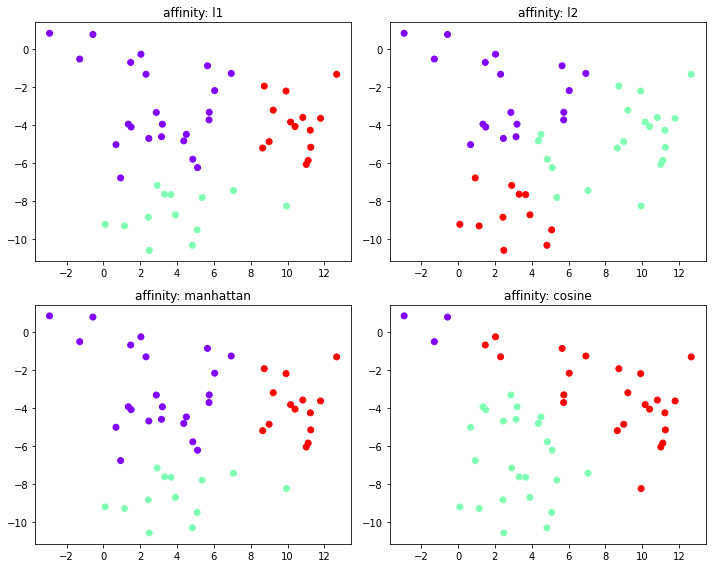

In [ ]:
# 최단연결법은 single, 평균연결법은 average, 최장연결법은 complete으로 표기한다.
affs = ['l1', 'l2', 'manhattan', 'cosine']

plt.figure(figsize=(10,8))

# # subplot() 함수를 사용하여 서브 플롯을 추가하고 반환 값을 y_axis라는 변수에 할당
# # sharey 매개 변수를 사용하여 서브 플롯에 대한 모든 호출에 이 변수를 전달하여 모든 플롯이 동일한 y 축 사용
# y_axis = None

for i, aff in enumerate(affs):
    # 서브플롯 추가, y축은 공유
    y_axis = plt.subplot(2, 2, i + 1)

    # 클러스터링
    agg = AgglomerativeClustering(n_clusters = 3, affinity = aff, linkage = 'complete')
    agg.fit(X)
    
    # 시각화
    plt.title('affinity: {}'.format(aff))
    plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap='rainbow')

plt.tight_layout()
plt.show()

거리 측정지표에 따라 군집형성 결과가 다르게 나오는 것을 확인할 수 있다.

# 이부분은 고민이 필요

출처 :
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py


In [ ]:
AgglomerativeClustering?

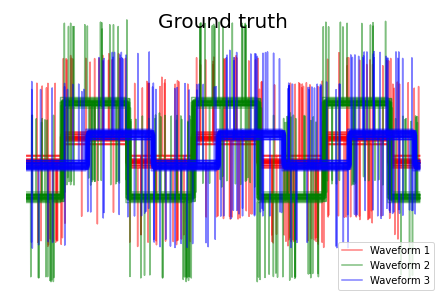

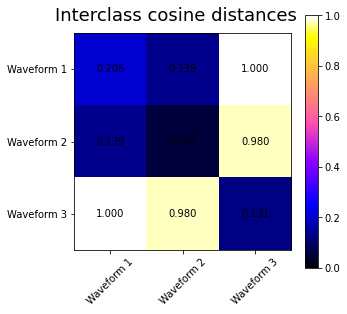

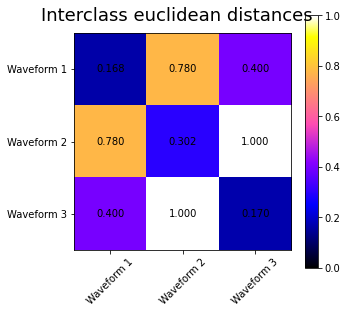

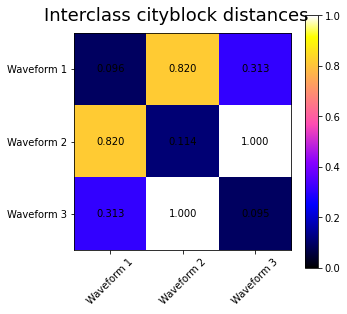

In [ ]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < .997] = 0

        X.append(12 * ((a + amplitude_noise)
                 * (sqr(6 * (t + phi + phase_noise)))
                 + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

# 클러스터의 개수
n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb',
                   labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')

plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric=metric).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j],
                     verticalalignment='center',
                     horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
               vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()

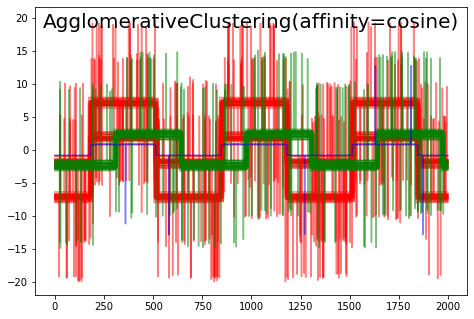

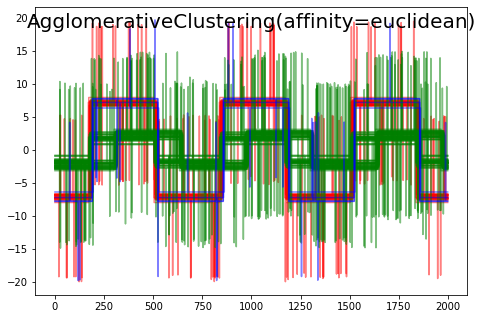

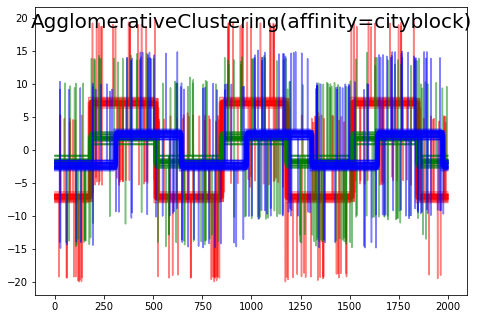

In [ ]:
# Plot clustering results
for _, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)
    model.fit(X)
    
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

# 2) 와인 데이터로 실습하기

군집분석을 하기 전에 분류모델과 군집화모델의 차이에 대해 다시 한번 생각해보자

가장 큰 차이는 분류모델은 y data(label)가 있는 지도학습에 속하며,  
군집화모델은 y data(label)이 없는 비지도학습에 속한다는 것이다.  

즉 군집화는 각 sample의 label에 대해 모를때, 데이터 자체의 특성을 통해 여러개의 label로 나누어 군집별 특성을 파악하고자 하는 것이고,  
반대로, 분류는 각 sample의 label에 대한 정보와 sample별 특성을 알고 있을 때, 특성과 label간의 관계를 학습하여 새로운 데이터에 대한 label을 예측하는 것을 목표로 한다.  

따라서, LogisticRegression에서 사용한 분류모델과는 달리 이번에는 target에 대한 정보가 없다고 가정해야한다.  
(즉, 와인의 유형에 대한 정보를 모르는 상태)  
와인에 대한 화학적인 측정치만을 분석하여 비슷한 특성을 지닌 와인들을 3가지 유형으로 군집화해보자.

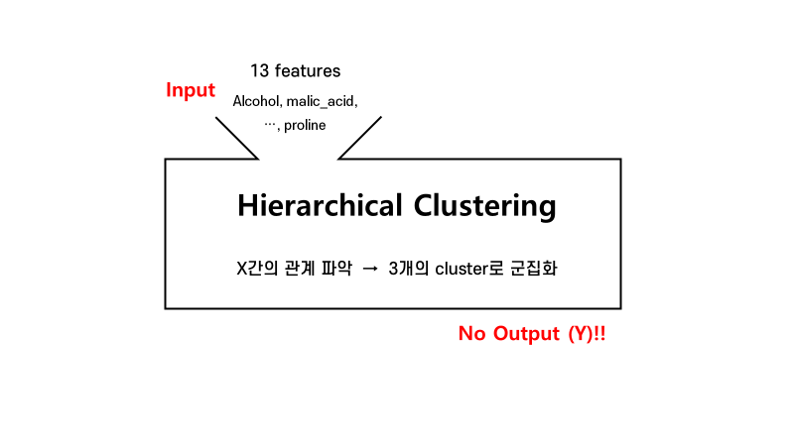

### 2.1 데이터 로드 및 확인

사이킷런에서 제공하는 와인 데이터셋으로 실제 군집 모델을 만들어보자.

3개의 포도 품종으로 만든 와인의 13개의 외관 및 성분적인 특성(feature) 값을 측정한 데이터

feature  
* `alcohol` : 알콜 도수
* `malic_acid` : 말산
* `ash` : 재
* `alcalinity_of_ash` : 알칼리도
* `magnesium` : 마그네슘
* `total_phenols` : 전체 페놀
* `flavanoids` : 플라보노이드 페놀
* `nonflavanoid_phenols` : 비플라보노이드 페놀
* `proanthocyanins` : 프로안토시아니딘 
* `color_intensity` : 색도
* `hue` : 빛깔, 색조
* `od280/od315_of_diluted_wines` : 희석된 와인의 od280/od315 비율
* `proline` : 프롤린


<a title="Swedish Pavilion at Shanghai Expo 2010, CC BY 2.0 &lt;https://creativecommons.org/licenses/by/2.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bengt_Frithiofsson_evaluating_wine.jpg"><img width="512" alt="Bengt Frithiofsson evaluating wine" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Bengt_Frithiofsson_evaluating_wine.jpg/512px-Bengt_Frithiofsson_evaluating_wine.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Bengt_Frithiofsson_evaluating_wine.jpg">Swedish Pavilion at Shanghai Expo 2010</a>, <a href="https://creativecommons.org/licenses/by/2.0">CC BY 2.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_wine
data_wine = load_wine()

In [ ]:
data_wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

df_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


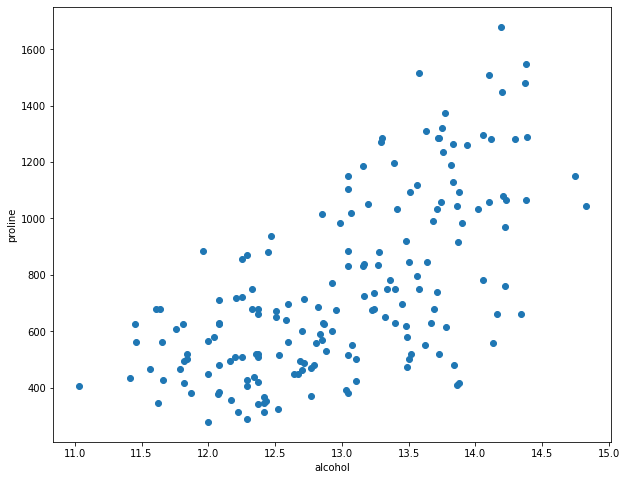

In [ ]:
# alcohol과 proline에 따른 와인 분포를 시각화하여 확인해보자
plt.figure(figsize = (10,8))
plt.scatter(df_wine['alcohol'], df_wine['proline'])
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.show()

## 2.2 모델링

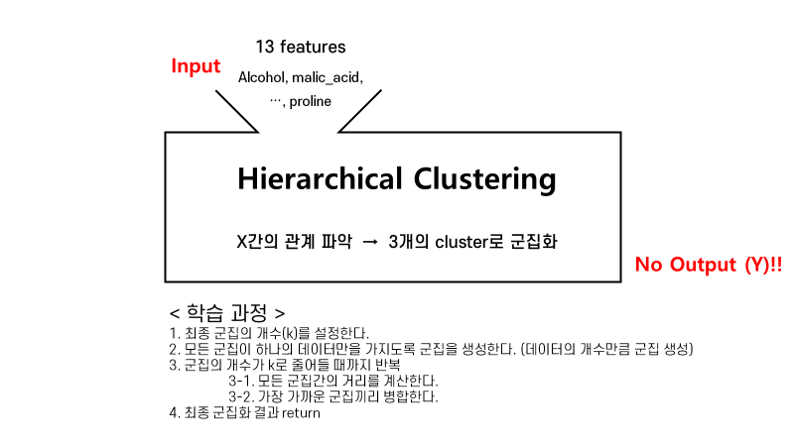

In [ ]:
model_wine = AgglomerativeClustering(n_clusters = 3)
model_wine.fit(df_wine)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
# pandas 데이터프레임의 groupby 연산을 활용하여 실제 와인 분류값과 얼마나 차이가 나는지 확인해보자
df_wine['target'] = data_wine.target
df_wine['cluster'] = model_wine.labels_
print(df_wine.groupby(['target','cluster'])['alcohol'].count())

target  cluster
0       0          46
        2          13
1       0           2
        1          51
        2          18
2       1          21
        2          27
Name: alcohol, dtype: int64


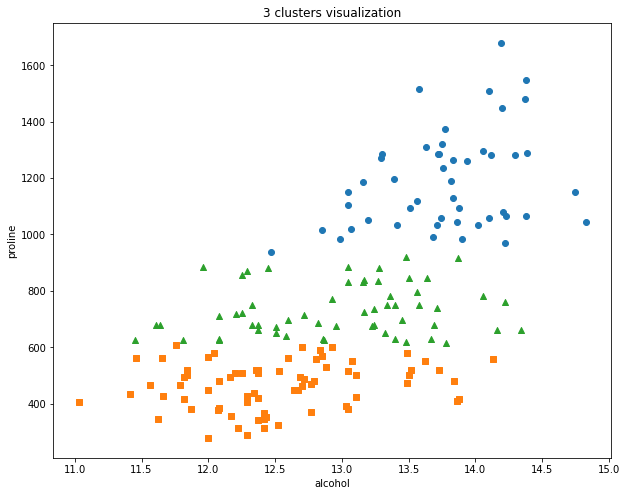

In [ ]:
# 이번에는 시각화를 통해 잘 군집화되었는지 확인해보자
plt.figure(figsize = (10, 8))

# 클러스터 값이 0, 1, 2 인 경우마다 별도의 인덱스를 추출
cluster0_index = df_wine[df_wine['cluster'] == 0].index
cluster1_index = df_wine[df_wine['cluster'] == 1].index
cluster2_index = df_wine[df_wine['cluster'] == 2].index

# 클러스터 0,1,2 에 해당하는 인덱스로 각 군집별 alcohol, proline 데이터 시각화
plt.scatter(df_wine.loc[cluster0_index, 'alcohol'], df_wine.loc[cluster0_index, 'proline'], marker = 'o')
plt.scatter(df_wine.loc[cluster1_index, 'alcohol'], df_wine.loc[cluster1_index, 'proline'], marker = 's')
plt.scatter(df_wine.loc[cluster2_index, 'alcohol'], df_wine.loc[cluster2_index, 'proline'], marker = '^')

plt.xlabel('alcohol')
plt.ylabel('proline')
plt.title('3 clusters visualization')
plt.show()

# (심화학습)

## Hierarchical Clustering pseudocode



```

class AgglomerativeClustering(object):

    학습 과정
    def fit(X_data):
        1. 최종 군집의 개수(k)를 설정한다.
        2. 모든 군집이 하나의 데이터만을 가지도록 군집을 생성한다. (데이터의 개수만큼 군집 생성)
        3. 군집의 개수가 k로 줄어들 때까지 반복
            3-1. 모든 군집간의 거리를 계산한다.
            3-2. 가장 가까운 군집끼리 병합한다.
        4. 최종 군집화 결과 return


```







```
def hierarchical_clustering(X, 연결법, 군집개수):
    1. 두 점간의 거리를 계산한 거리행렬(distance matrix)을 구한다.
    2. 거리행렬의 대각선원소(개별 데이터와 자기 자신까지의 거리)를 무한(infinity)로 설정한다.
    3. find_clusters 함수를 이용하여 입력받은 군집개수가 될 때까지 군집형성 결과를 구한다.
    4. 군집화 결과 시각화 및 return


def find_clusters(거리행렬, 연결법):
    모든 데이터가 하나의 군집이 될때까지 군집화를 반복
        1. 가장 거리가 짧은 데이터를 구한다.
        2. 최소거리의 데이터를 하나의 군집으로 형성한다.
        3. 새로 형성한 군집을 기준으로 모든 데이터에 대한 거리를 구한다.
            if 단일연결법의 경우:
                군집 간의 데이터 중 가장 짧은 거리를 계산
            elif 완전연결법의 경우:
                군집 간의 데이터 중 가장 먼 거리를 계산
            elif 평균연결법의 경우:
                군집 간의 데이터의 평균 거리를 계산
        4. 군집화 결과 저장
    
    모든 데이터가 하나의 군집이 될 때까지 과정을 return

```

참고 : https://github.com/hhundiwala/hierarchical-clustering



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [ ]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']

    # 두 점의 거리를 계산한 거리행렬(distance matrix)을 구한다.
    initial_distances = pairwise_distances(data,metric='euclidean')
                                           
    #making all the diagonal elements infinity
    # 거리행렬의 대각선원소(개별 데이터와 자기 자신까지의 거리)를 무한(infinity)으로 설정한다.
    np.fill_diagonal(initial_distances,sys.maxsize)

    # find_clusters 함수를 이용하여 군집이 no_of_clusters 개가 될 때까지 군집화 결과를 구한다.
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    # 군집화 결과 시각화
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))

    p=0
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
    plt.show()

    return clusters_to_plot

In [ ]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    
    for n in range(input.shape[0]):
        array.append(n)

    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    # 모든 데이터가 하나의 군집에 될때까지 군집화를 반복한다.
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        # 거리행렬에서 가장 작은 수(거리가 가장 짧은 경우)의 데이터를 구한다.
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
        # 군집화 결과를 array에 저장한다
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if (array[n]==maximum):
                array[n] = minimum

        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        # 최소거리의 데이터를 군집화한 뒤 군집을 기준으로 모든 데이터에 대한 거리를 새로 구한다.

        #for Single Linkage
        # 단일연결법의 경우
        if (linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if (i != col_index and i!=row_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        #for Complete Linkage
        # 완전연결법의 경우
        elif (linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if (i != col_index and i!=row_index):
                    temp = max(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        #for Average Linkage
        # 평균연결법의 경우
        elif (linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if (i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            

        # k번 군집화를 반복한 결과를 저장한다.
        clusters[k] = array.copy()
        
    return clusters

In [ ]:
#Our Dataset
data = np.array([0.40,0.53,0.22,0.38,0.35,0.32,0.26,0.19,0.08,0.41,0.45,0.30]).reshape(6,2)
print(data)

[[0.4  0.53]
 [0.22 0.38]
 [0.35 0.32]
 [0.26 0.19]
 [0.08 0.41]
 [0.45 0.3 ]]


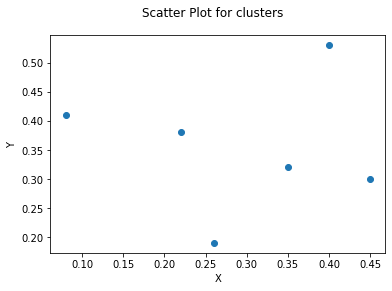

In [ ]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

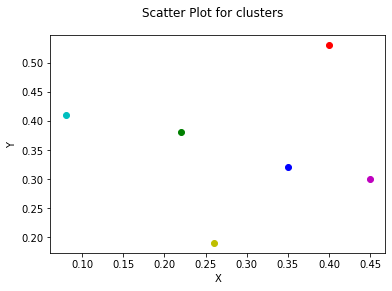

[0, 1, 2, 3, 4, 5]

In [ ]:
hierarchical_clustering(data,"single",6)

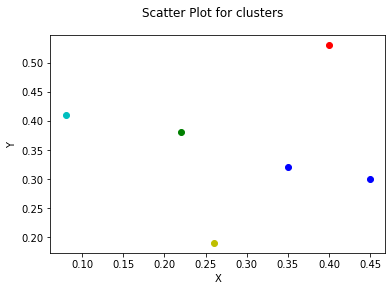

[0, 1, 2, 3, 4, 2]

In [ ]:
hierarchical_clustering(data,"single",5)
#you can see that the color of data[2] and data[5] became same, thus they are in same cluster now

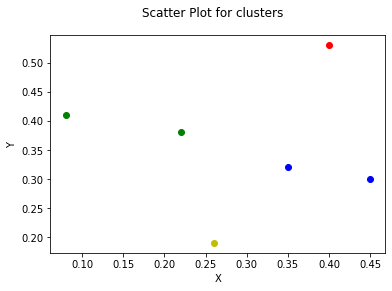

[0, 1, 2, 3, 1, 2]

In [ ]:
hierarchical_clustering(data,"single",4)

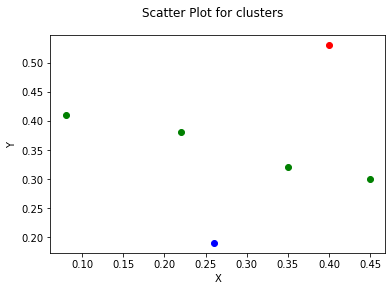

[0, 1, 1, 3, 1, 1]

In [ ]:
hierarchical_clustering(data,"single",3)

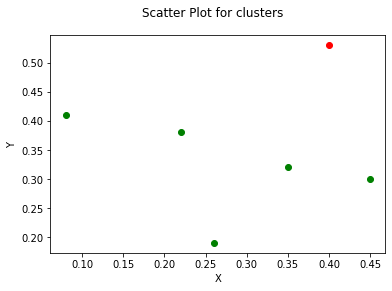

[0, 1, 1, 1, 1, 1]

In [ ]:
hierarchical_clustering(data,"single",2)

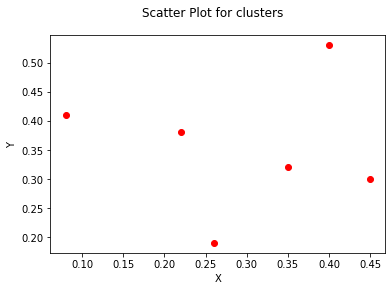

[0, 0, 0, 0, 0, 0]

In [ ]:
hierarchical_clustering(data,"single",1)

## 다른 후보 1

In [ ]:
import numpy as np
X = np.array([[0.40,0.53], [0.22,0.32], [0.35,0.32], [0.26,0.19], [0.08,0.41], [0.35,0.30], [0.80,0.98], [0.28,0.33] ])

In [ ]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        # 모든 데이터에 대해 거리를 계산한 행렬을 구한다
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        # 두 개의 데이터에 대해 거리를 계산한다
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except: # 주어진 데이터가 하나는 포인트, 하나는 클러스터인 경우 특별한 함수(intersampledist)를 이용해 거리를 계산한다.
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        
        # 모든 거리 중 최소값 return
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        # 주어진 데이터가 하나는 포인트, 하나는 클러스터인 경우 거리를 계산하는 함수
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''

        # 
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [ ]:

progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  8
Cluster Node 1                   :- [2]
Cluster Node 2                   :- [5]
Progression(Current Sample)      :- [[0], [1], [[2, [5]]], [3], [4], [6], [7]]
Cluster attained                 :- [[2, [5]]]
Sample size after clustering     :- 7


Sample size before clustering    :-  7
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [7]
Progression(Current Sample)      :- [[0], [[1, [7]]], [[2, [5]]], [3], [4], [6]]
Cluster attained                 :- [[1, [7]]]
Sample size after clustering     :- 6


Sample size before clustering    :-  6
Cluster Node 1                   :- [[1, [7]]]
Cluster Node 2                   :- [[2, [5]]]
Progression(Current Sample)      :- [[0], [[[1, [7]], [[2, [5]]]]], [3], [4], [6]]
Cluster attained                 :- [[[1, [7]], [[2, [5]]]]]
Sample size after clustering     :- 5


Sample size before clustering    :-  5
Cluster Node 1                   :- [[[1, [7]], [[2, [5]]]]]
Cluster Nod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## 다른 후보 2

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs

k = 3

class cluster_node:
	def __init__(self, vec, id, left=None, right=None, distance=0.0, node_vector = None):
		self.leftnode = left
		self.rightnode = right
		self.vec = vec
		self.id = id
		self.distance = distance
		if node_vector is None:
			self.node_vector = [self.id]
		else:
			self.node_vector = node_vector[:]

def euclidean_distance(vec1, vec2):
	return np.sqrt(sum((vec1 - vec2) ** 2))

def min_distance(clust1, clust2, distances):
	d = 12123123123123
	for i in clust1.node_vector:
		for j in clust2.node_vector:
			try:
				distance = distances[(i,j)]
			except:
				try:
					distance = distances[(j,i)]
				except:
					distance = euclidean_distance(clust1.vec, clust2.vec)
			if distance < d:
				d = distance
	return d

def agglomerative_clustering(data, distance):
	# cluster the rows of the data matrix
	distances = {}
	currentclustid = -1

	# cluster nodes are initially just the individual rows
	nodes = [cluster_node(np.array(data[i]), id=i) for i in range(len(data))]

	while len(nodes) > k:
		lowestpair = (0,1)
		closest = euclidean_distance(nodes[0].vec,nodes[1].vec)
	
		# loop through every pair looking for the smallest distance
		for i in range(len(nodes)):
			for j in range(i+1,len(nodes)):
				# distances is the cache of distance calculations
				if (nodes[i].id,nodes[j].id) not in distances:
					if distance == "min":
						distances[(nodes[i].id,nodes[j].id)] = min_distance(nodes[i], nodes[j], distances)
					else:
						distances[(nodes[i].id,nodes[j].id)] = euclidean_distance(nodes[i].vec,nodes[j].vec)
		
				d = distances[(nodes[i].id,nodes[j].id)]
		
				if d < closest:
					closest = d
					lowestpair = (i,j)
		
		# calculate the average of the two nodes
		len0 = len(nodes[lowestpair[0]].node_vector)
		len1 = len(nodes[lowestpair[1]].node_vector)
		mean_vector = [(len0*nodes[lowestpair[0]].vec[i] + len1*nodes[lowestpair[1]].vec[i])/(len0 + len1) \
						for i in range(len(nodes[0].vec))]
		
		# create the new cluster node
		new_node = cluster_node(np.array(mean_vector), currentclustid, left = nodes[lowestpair[0]], right = nodes[lowestpair[1]], \
			distance = closest, node_vector = nodes[lowestpair[0]].node_vector + nodes[lowestpair[1]].node_vector)
		
		# cluster ids that weren't in the original set are negative
		currentclustid -= 1
		del nodes[lowestpair[1]]
		del nodes[lowestpair[0]]
		nodes.append(new_node)

	return nodes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


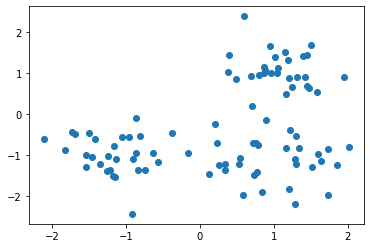

In [ ]:
# Generate data
# df = pd.read_csv('./segmentation.data.modified')
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples = 90, centers = centers, cluster_std = 0.5)
df = pd.DataFrame(X) ## convert to DF

# Visualize the data
f = plt.figure(1)
plt.scatter(df[0],df[1])
f.show()

In [ ]:
colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']

data = np.array(df)

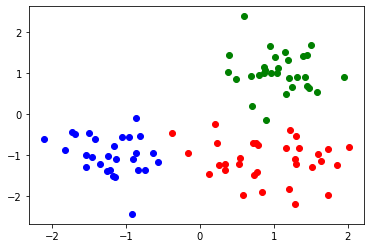

In [ ]:
# Average criterion agglomerative clustering
cluster = agglomerative_clustering(data, "avg")
# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
j = 0
m = plt.figure(2)
for i in cluster:
    plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
    j += 1
m.show()

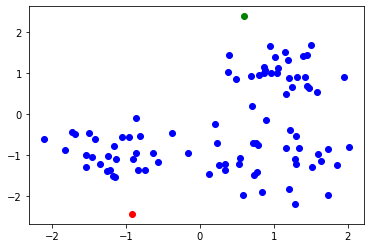

In [ ]:
# Min criterion agglomerative clustering
g = plt.figure(3)
cluster = agglomerative_clustering(data, "min")
# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
j = 0
for i in cluster:
    plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
    j += 1
g.show()